# Introduction to this python notebook

In [ ]:
"""
What? Comparison of calibration of classifier

We are going to compare 4 classification strategies:
[1] logistic
[2] Naive Bayes
[3] SVC
[4] Random forest

Well calibrated classifiers are probabilistic classifiers for which the output of the prediction can 
be DIRECTLY INTERPRETED as a CONFIDENCE LEVEL. For instance a well calibrated (binary) classifier should classify 
the samples such that among the samples to which it gave a prediction probability value close to 0.8, approximately
80% actually belong to the positive class.

Reference: https://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html#sphx-glr-auto-examples-calibration-plot-compare-calibration-py
           Predicting Good Probabilities with Supervised Learning, A. Niculescu-Mizil & R. Caruana, ICML 2005
"""

# Import python modules

In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

# Create and split dataset

In [2]:
X, y = datasets.make_classification(n_samples=100000, n_features=20, n_informative=2, n_redundant=2)

# Samples used for training the models
train_samples = 100 

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

# Instantiate classifier

In [3]:
# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier()

# Plot calibration plot

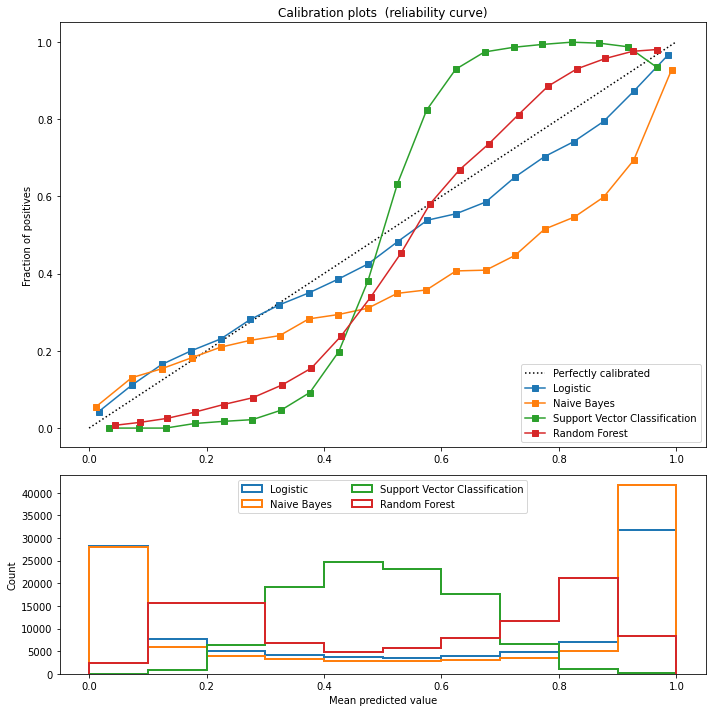

In [10]:
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    # use decision function
    else:  
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins= 20)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % (name, ))
    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name, histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [ ]:
"""
[1] LOGISTIC REGRESSION returns well calibrated predictions as it directly optimizes log-loss. 

In contrast, the other methods return BIASED probabilities, with different biases per method.

[2] GAUSSIAN NAIVE BAYES tends to push probabilities to 0 or 1 (note the counts in the histograms). 
This is mainly because it makes the assumption that features are conditionally independent given the
class, which is not the case in this dataset which contains 2 redundant features.

[3] RANDOM FOREST CLASSIFIER shows the opposite behavior: the histograms show peaks at approx. 0.2 and
0.9 probability, while probabilities close to 0 or 1 are very rare. Methods such as bagging and random 
forests that average predictions from a base set of models can have difficulty making predictions near 
0 and 1 because variance in the underlying base models will bias predictions that should be near zero 
or one away from these values. 
For example, if a model should predict p = 0 for a case, the only way bagging can achieve this is if all 
bagged trees predict zero. If we add noise to the trees that bagging is averaging over, this noise will 
cause some trees to predict values larger than 0 for this case, thus moving the average prediction of the 
bagged ensemble away from 0. We observe this effect most strongly with random forests because the base-level
trees trained with random forests have relatively high variance due to feature subsetting.”

[4] SUPPORT VECTOR CLASSIFICATION (SVC) shows an even more sigmoid curve as the RandomForestClassifier, 
which is typical for maximum-margin methods, which focus on hard samples that are close to the decision 
boundary (the support vectors).
"""